# Accident Severity Prediction from Road Conditions


### Exploratory Data Analysis



##### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"melikeberiaayas","key":"ef3301646bb71614dc627149f4d44074"}'}

In [4]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/

In [5]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
100% 652M/653M [00:32<00:00, 19.7MB/s]
100% 653M/653M [00:32<00:00, 21.3MB/s]


In [6]:
!unzip /content/us-accidents.zip -d /content/

Archive:  /content/us-accidents.zip
  inflating: /content/US_Accidents_March23.csv  


In [7]:
import pandas as pd

df = pd.read_csv('/content/US_Accidents_March23.csv') # Loaded the dataset into df

df.head() # the first 5 rows and last 5 rows of the data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
print("Shape:", df.shape)  # the number of rows and columns in the dataset
print("\nColumn Names:", df.columns)  # all column names
print("\nData Types:\n", df.dtypes)  # the data types of each column

Shape: (7728394, 46)

Column Names: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Data Types:
 ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng 


#### Summary Stats of Numeric Columns
Count: The total number of observations                                              
Mean: The average value                     
Standard Deviation (Std): A measure of the spread of the data                        
Min: The smallest value                                          
25th Percentile (Q1): The first quartile (25% of the data is below this value)                         
50th Percentile (Median or Q2): The median (50% of the data is below this value)                               
75th Percentile (Q3): The third quartile (75% of the data is below this value)                               
Max: The largest value                      

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01



#### Identifying Column Types

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # categorical columns
bool_cols = df.select_dtypes(include=['bool']).columns  # boolean columns

print("Numerical Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)
print("Boolean Columns:", bool_cols)

Numerical Columns: Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')
Categorical Columns: Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')
Boolean Columns: Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


#### Checking Missing Values

In [11]:
missing = df.isnull().sum()  # Counted missing values in each column
missing_percentage = (missing / len(df)) * 100  # Calculated the percentage of missing values

print("Missing Values:\n", pd.DataFrame({'Count': missing, 'Percentage': missing_percentage}))


Missing Values:
                          Count  Percentage
ID                           0    0.000000
Source                       0    0.000000
Severity                     0    0.000000
Start_Time                   0    0.000000
End_Time                     0    0.000000
Start_Lat                    0    0.000000
Start_Lng                    0    0.000000
End_Lat                3402762   44.029355
End_Lng                3402762   44.029355
Distance(mi)                 0    0.000000
Description                  5    0.000065
Street                   10869    0.140637
City                       253    0.003274
County                       0    0.000000
State                        0    0.000000
Zipcode                   1915    0.024779
Country                      0    0.000000
Timezone                  7808    0.101030
Airport_Code             22635    0.292881
Weather_Timestamp       120228    1.555666
Temperature(F)          163853    2.120143
Wind_Chill(F)          1999019   25.8

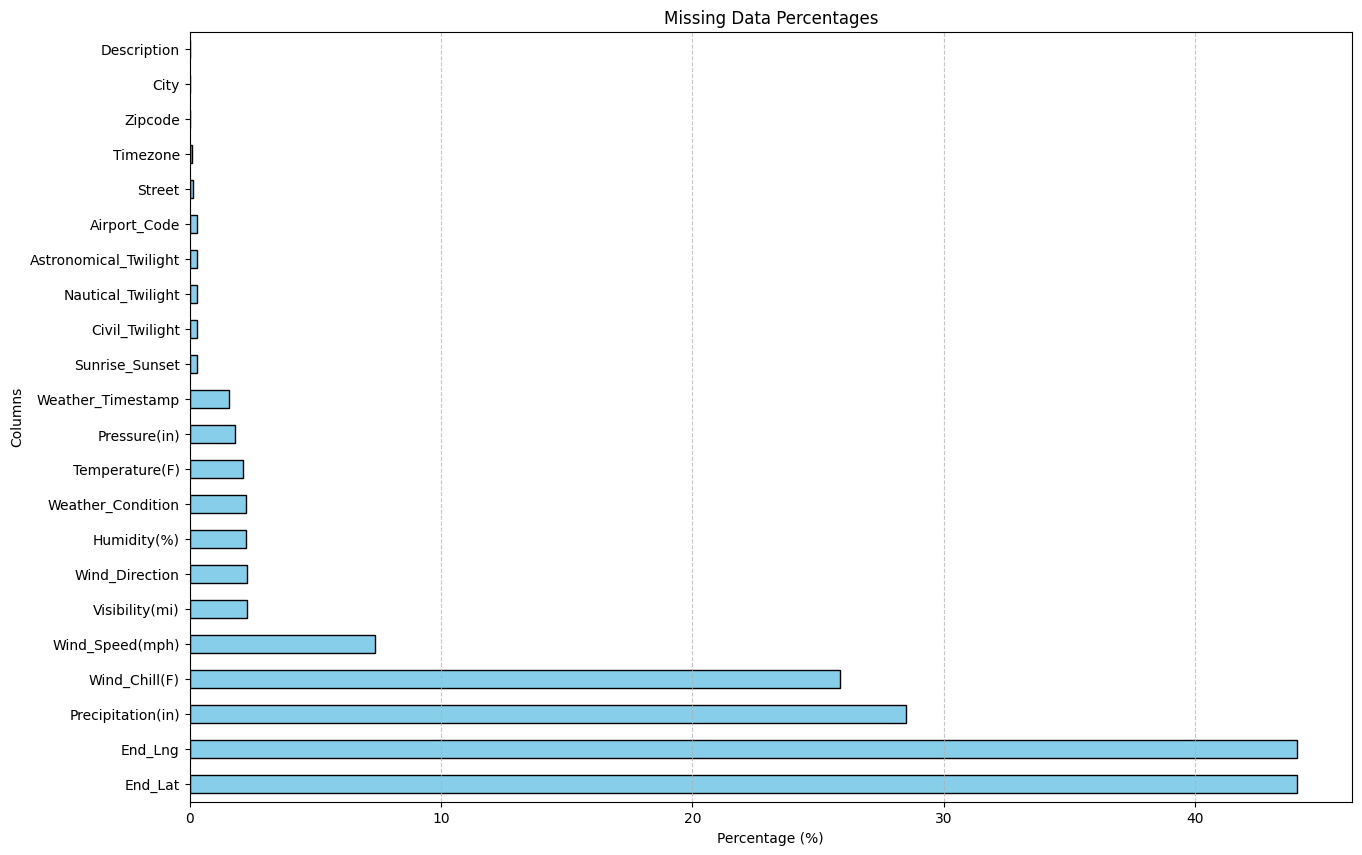

In [12]:
# Horizontal Bar Plot for Missing Values
import matplotlib.pyplot as plt

# Sorted missing percentages that are not zero
missing_percentage[missing_percentage != 0].sort_values(ascending=False).plot(
    kind='barh',
    color='skyblue',
    figsize=(15, 10),
    edgecolor='black'
)

plt.title("Missing Data Percentages")
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### Correlation Analysis

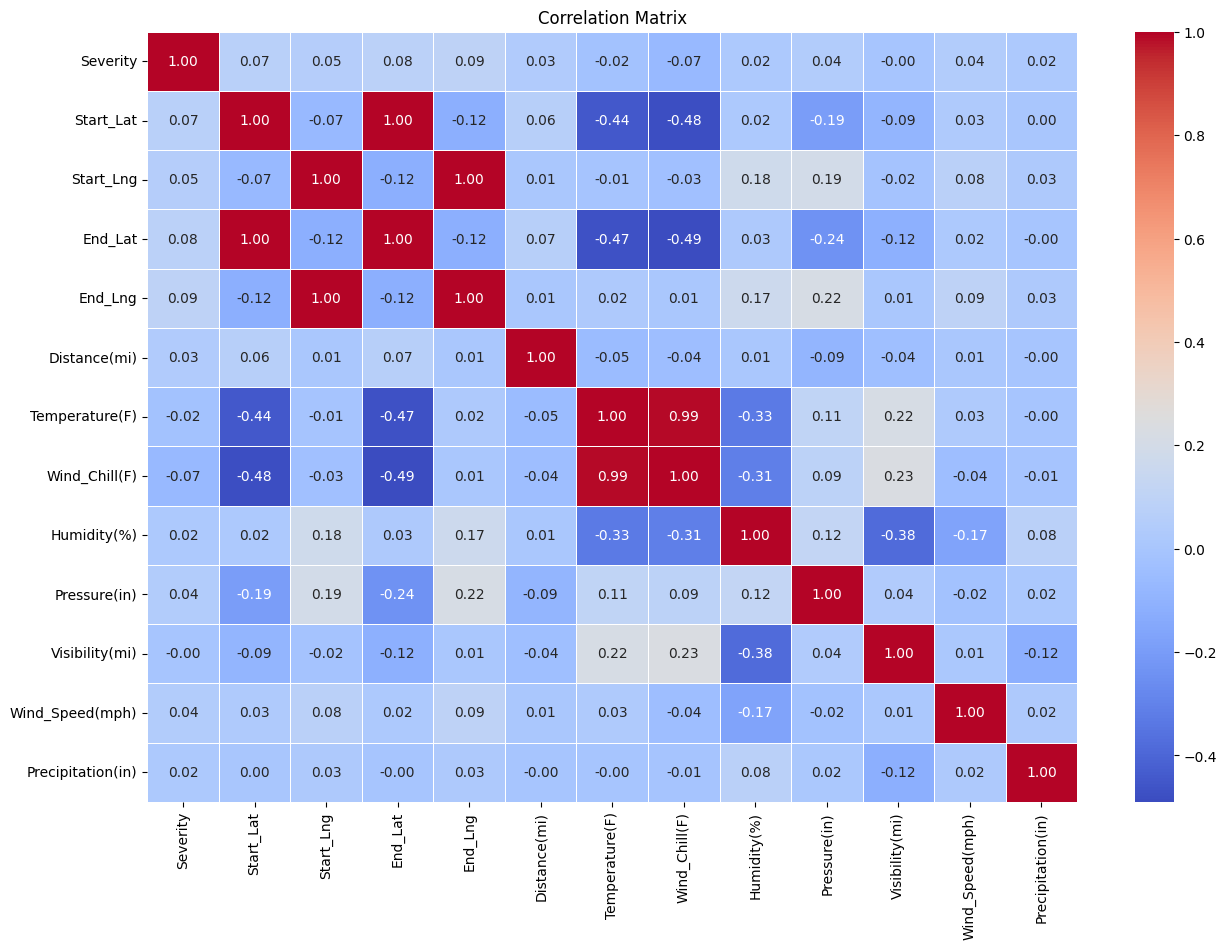

In [13]:
# Correlation matrix visualization
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data Preparation
Data Preparation is the process of transforming raw data into a suitable format for modeling.

#### Feature Extraction

In [14]:
# Converted Start_Time and End_Time to datetime format, marking invalid formats as 'NaT'.
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Identified rows with invalid dates (NaT).
invalid_dates = df[df['Start_Time'].isna() | df['End_Time'].isna()]
print(f"Number of invalid Start_Time or End_Time entries: {len(invalid_dates)}")

# Removed rows with invalid Start_Time or End_Time from the dataset.
df = df.dropna(subset=['Start_Time', 'End_Time'])

# Extracted year, month, day, and hour features from Start_Time.
df['Start_Year'] = df['Start_Time'].dt.year
df['Start_Month'] = df['Start_Time'].dt.month
df['Start_Day'] = df['Start_Time'].dt.day
df['Start_Hour'] = df['Start_Time'].dt.hour

# Extracted year, month, day, and hour features from End_Time.
df['End_Year'] = df['End_Time'].dt.year
df['End_Month'] = df['End_Time'].dt.month
df['End_Day'] = df['End_Time'].dt.day
df['End_Hour'] = df['End_Time'].dt.hour

# Verified newly created columns.
print(df[['Start_Time', 'Start_Year', 'Start_Month', 'Start_Day', 'Start_Hour']].head())
print(df[['End_Time', 'End_Year', 'End_Month', 'End_Day', 'End_Hour']].head())


Number of invalid Start_Time or End_Time entries: 743166
           Start_Time  Start_Year  Start_Month  Start_Day  Start_Hour
0 2016-02-08 05:46:00        2016            2          8           5
1 2016-02-08 06:07:59        2016            2          8           6
2 2016-02-08 06:49:27        2016            2          8           6
3 2016-02-08 07:23:34        2016            2          8           7
4 2016-02-08 07:39:07        2016            2          8           7
             End_Time  End_Year  End_Month  End_Day  End_Hour
0 2016-02-08 11:00:00      2016          2        8        11
1 2016-02-08 06:37:59      2016          2        8         6
2 2016-02-08 07:19:27      2016          2        8         7
3 2016-02-08 07:53:34      2016          2        8         7
4 2016-02-08 08:09:07      2016          2        8         8


In [15]:
# Dropped Start_Time and End_Time columns as new features were extracted from these columns.
df = df.drop(columns=['Start_Time', 'End_Time'])


In [16]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Start_Year', 'Start_Month', 'Start_Day',
       'Start_Hour', 'End_Year', 'End_Month', 'End_Day', 'End_Hour'],
      dtype='object')

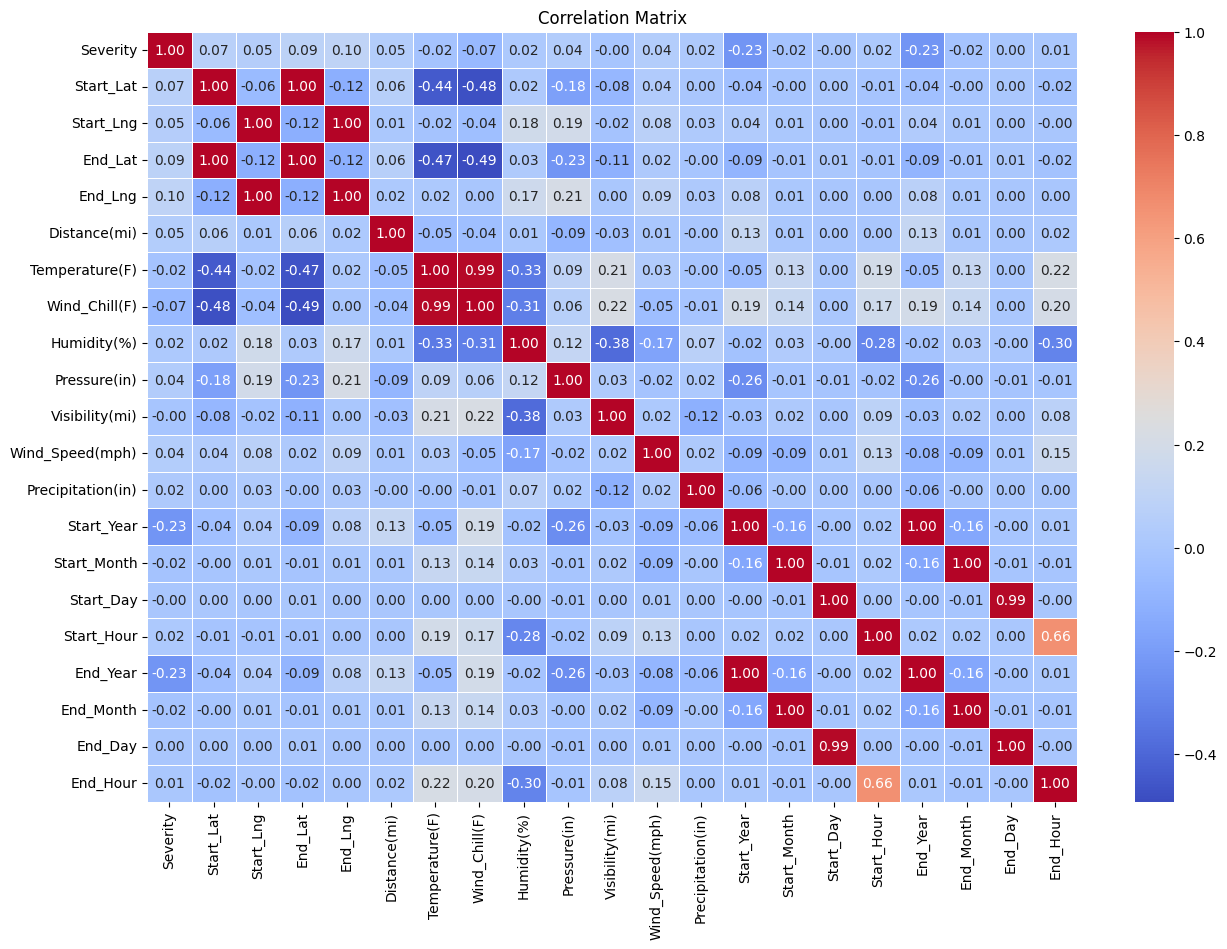

In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns
# Correlation matrix visualization
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Feature Selection

In [18]:
# Calculated the absolute correlation matrix and filtered highly correlated features based on the threshold.
threshold = 0.9
high_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Removed self-correlations (correlation of 1) from the results.
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]

# Selected pairs with correlation values greater than the threshold.
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]
print(high_corr_pairs)


Start_Lng       End_Lng           0.999999
End_Lng         Start_Lng         0.999999
End_Lat         Start_Lat         0.999994
Start_Lat       End_Lat           0.999994
End_Year        Start_Year        0.999870
Start_Year      End_Year          0.999870
Start_Month     End_Month         0.998537
End_Month       Start_Month       0.998537
Wind_Chill(F)   Temperature(F)    0.993783
Temperature(F)  Wind_Chill(F)     0.993783
Start_Day       End_Day           0.989931
End_Day         Start_Day         0.989931
dtype: float64


In [19]:
# Counted the number of missing values in specific columns
missing = df[['Start_Lng', 'End_Lng', 'Start_Lat', 'End_Lat', 'Temperature(F)', 'Wind_Chill(F)', 'End_Year', 'Start_Year','Start_Month','End_Month','Start_Day','End_Day']].isnull().sum()

# Calculated the percentage of missing values in each column
missing_percentage = (missing / len(df)) * 100

# Printed the count and percentage of missing values for each column
print("Missing Values:\n", pd.DataFrame({'Count': missing, 'Percentage': missing_percentage}))

Missing Values:
                   Count  Percentage
Start_Lng             0    0.000000
End_Lng         3402762   48.713686
Start_Lat             0    0.000000
End_Lat         3402762   48.713686
Temperature(F)   146088    2.091385
Wind_Chill(F)   1974085   28.260853
End_Year              0    0.000000
Start_Year            0    0.000000
Start_Month           0    0.000000
End_Month             0    0.000000
Start_Day             0    0.000000
End_Day               0    0.000000


In [20]:
# 'End_Lng', 'End_Lat', and 'Wind_Chill(F)' were dropped due to high correlation and missing values.
df = df.drop(columns=['End_Lng', 'End_Lat', 'Wind_Chill(F)'])

# 'End_Year','End_Month','End_Day' were dropped due to high correlation.
df = df.drop(columns=['End_Year','End_Month','End_Day'])

df = df.drop(columns=['Start_Year'])

In [21]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Start_Month', 'Start_Day', 'Start_Hour', 'End_Hour'],
      dtype='object')

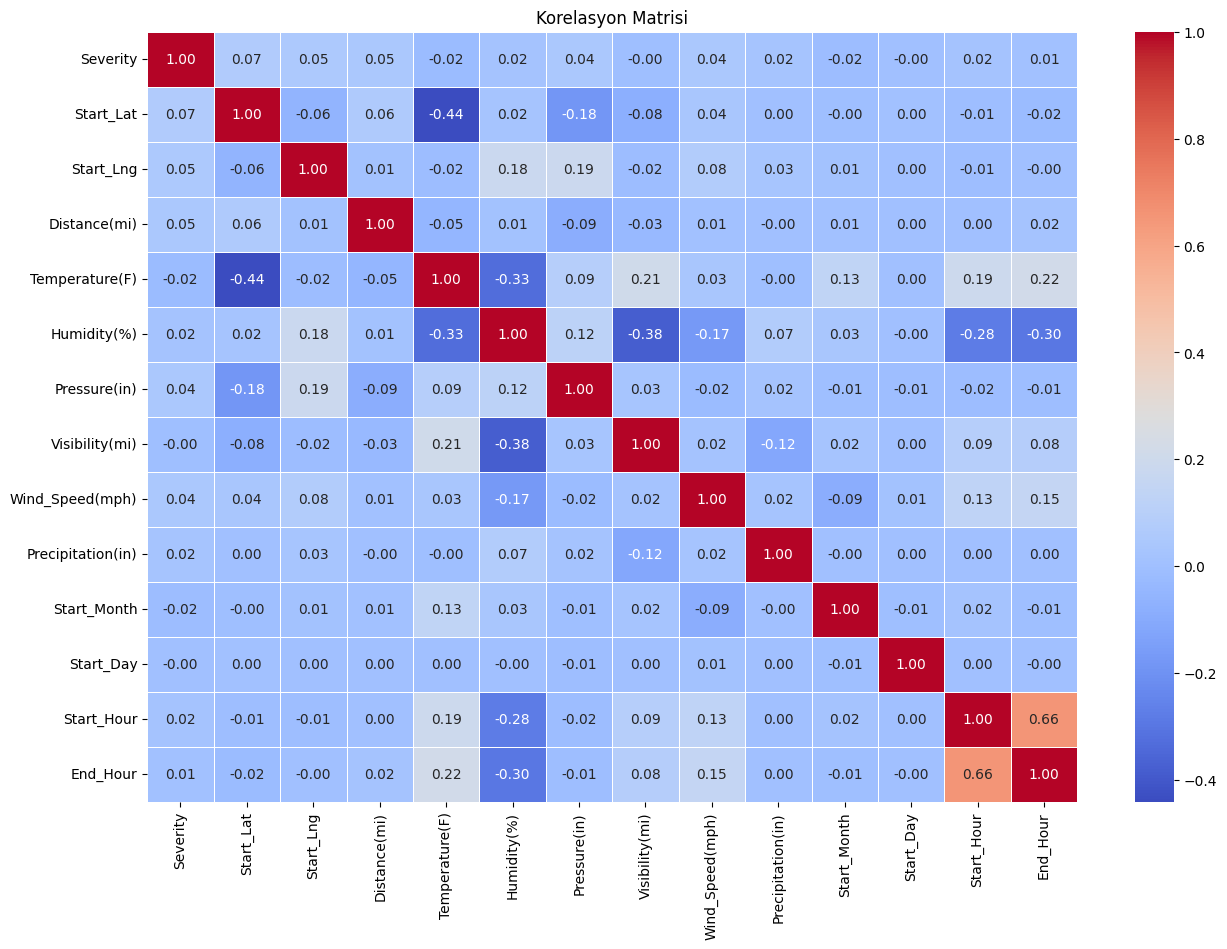

In [22]:
numerical_cols = df.select_dtypes(include=['number']).columns

corr_matrix = df[numerical_cols].corr()

# Correlation matrix visualization
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [23]:
# Created Morning, Afternoon, and Evening categories using the hour column.
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Converted the 'hour' column into categories.
df['Time_of_Day'] = df['Start_Hour'].apply(categorize_time)

# Reviewed the results.
print(df[['Start_Hour', 'Time_of_Day']].head())


   Start_Hour Time_of_Day
0           5     Evening
1           6     Morning
2           6     Morning
3           7     Morning
4           7     Morning


In [24]:
df = df.drop(columns=['Start_Hour','End_Hour'])

In [25]:
df.dtypes

,0
ID,object
Source,object
Severity,int64
Start_Lat,float64
Start_Lng,float64
Distance(mi),float64
Description,object
Street,object
City,object
County,object


In [26]:
df.head()

,ID,Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Month,Start_Day,Time_of_Day
0,A-1,Source2,3,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,...,False,False,False,Night,Night,Night,Night,2,8,Evening
1,A-2,Source2,2,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,...,False,False,False,Night,Night,Night,Day,2,8,Morning
2,A-3,Source2,2,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,False,True,False,Night,Night,Day,Day,2,8,Morning
3,A-4,Source2,3,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,False,False,False,Night,Day,Day,Day,2,8,Morning
4,A-5,Source2,2,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,False,True,False,Day,Day,Day,Day,2,8,Morning


#### Data Cleaning


In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns  # categorical columns

# Missing data in each categorical column filled with the mode value.
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [28]:
df.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
Street,0
City,0
County,0


In [29]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Filled missing data in each numeric column with the mean value.
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)


In [30]:
df.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
Street,0
City,0
County,0


In [31]:
df.dtypes

,0
ID,object
Source,object
Severity,int64
Start_Lat,float64
Start_Lng,float64
Distance(mi),float64
Description,object
Street,object
City,object
County,object


In [32]:
# Defined a function to merge Severity classes.
def merge_classes(severity):
    if severity in [1, 2]:  # Less severe
        return 0
    elif severity in [3, 4]:  # More severe
        return 1
    return severity  # Retained other cases as is (can be removed if unnecessary)

# Relabeled the Severity classes.
df['Severity'] = df['Severity'].apply(merge_classes)

# Checked the results.
print(df['Severity'].value_counts())


Severity
0    5501242
1    1483986
Name: count, dtype: int64


In [33]:
# Converted the 'Severity' column to object type for data transformation.
df['Severity'] = df['Severity'].astype('object')

# Checked the results.
print(df.dtypes)


ID                        object
Source                    object
Severity                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway   


#### Data Transformation

In [34]:
# Applied label coding to convert each categorical column into numeric values for modeling.
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])



#### Outlier Detection

In [35]:
df.shape

(6985228, 44)

In [36]:
# Applied Isolation Forest Model to detect and remove outliers.
from sklearn.ensemble import IsolationForest

# Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_predictions = iso_forest.fit_predict(df)

# Removed outliers from the dataset.
outliers = df[outlier_predictions == -1]
df = df[outlier_predictions == 1]


In [37]:
df.shape


(6635966, 44)

#### Sampling

In [38]:
# # Applied sampling to reduce the time and computational cost for model training, as the dataset is very large.
import pandas as pd
from sklearn.utils import resample

# Target variable
target_column = 'Severity'

classes = df[target_column].unique()

sampled_data = pd.DataFrame()

# Performed sampling by randomly selecting 25% of the data from each class
for c in classes:
    class_data = df[df[target_column] == c]

    class_sample = resample(class_data,
                            replace=False,
                            n_samples=int(len(class_data) * 0.25),
                            random_state=42)

    sampled_data = pd.concat([sampled_data, class_sample])

df = sampled_data


In [39]:

df.shape

(1658990, 44)

In [40]:
target_column = 'Severity'

classes = df[target_column].unique()
print(classes)

[1 0]


In [41]:
df['Severity'].value_counts()

,count
Severity,
0,1323307
1,335683



#### Data Splitting

In [42]:
from sklearn.model_selection import train_test_split
# Created x and y data (X properties, y target variable)
X = df.drop(columns=['Severity'])
y = df['Severity']

#divided the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### SMOTE

In [43]:
# Balanced the dataset using SMOTE.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train , y_train = smote.fit_resample(X_train, y_train)

## Modeling

#### Random Forest Model

In [44]:

from sklearn.ensemble import RandomForestClassifier

# Created a Random Forest model with class weights adjusted to give more importance to Severity 1.
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Trained the model using the balanced dataset.
model.fit(X_train, y_train)

# Made predictions on the test dataset.
y_pred = model.predict(X_test)



Accuracy: 0.9273
Precision: 0.8079
Recall: 0.8370
F1 Score: 0.8222

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95    265152
           1       0.81      0.84      0.82     66646

    accuracy                           0.93    331798
   macro avg       0.88      0.89      0.89    331798
weighted avg       0.93      0.93      0.93    331798



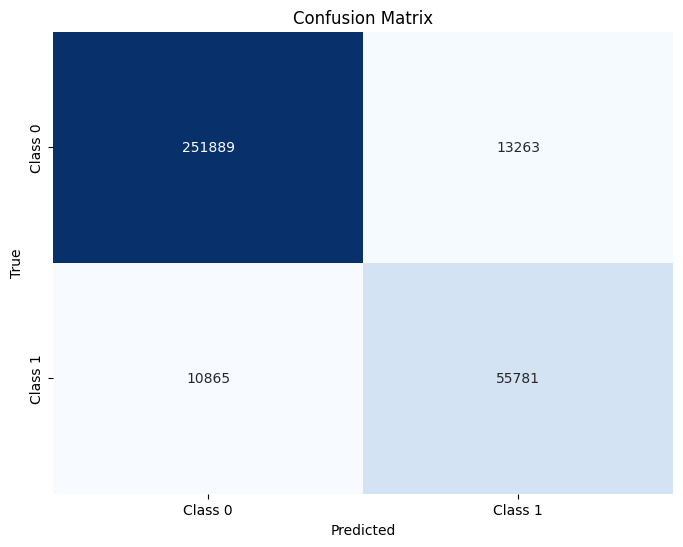

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=[f"Class {i}" for i in range(len(conf_matrix))],
            yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ROC AUC: 0.9657


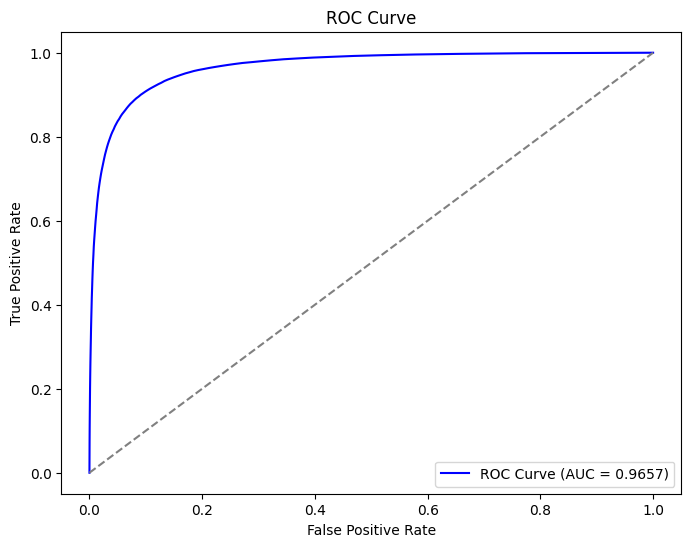

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC Score and ROC Curve for binary classification
if len(set(y_test)) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)  # Calculate ROC AUC score
    print(f'ROC AUC: {roc_auc:.4f}')

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6791
Precision: 0.3448
Recall: 0.6641
F1 Score: 0.4540

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77    265152
           1       0.34      0.66      0.45     66646

    accuracy                           0.68    331798
   macro avg       0.62      0.67      0.61    331798
weighted avg       0.78      0.68      0.71    331798



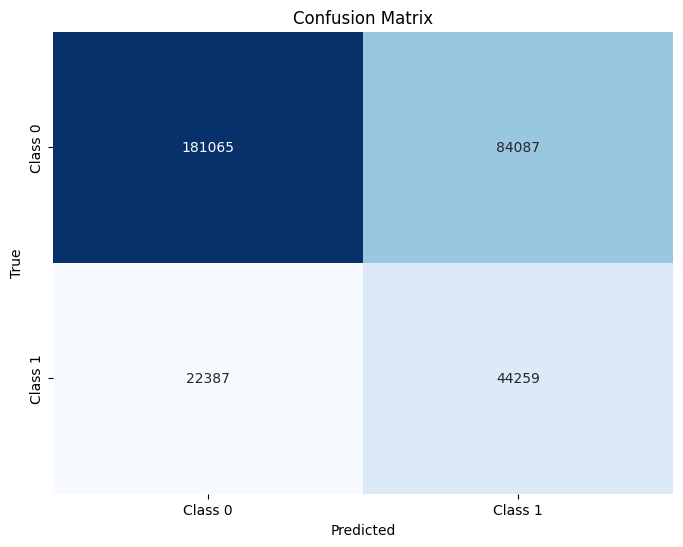

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=[f"Class {i}" for i in range(len(conf_matrix))],
            yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ROC AUC: 0.7250


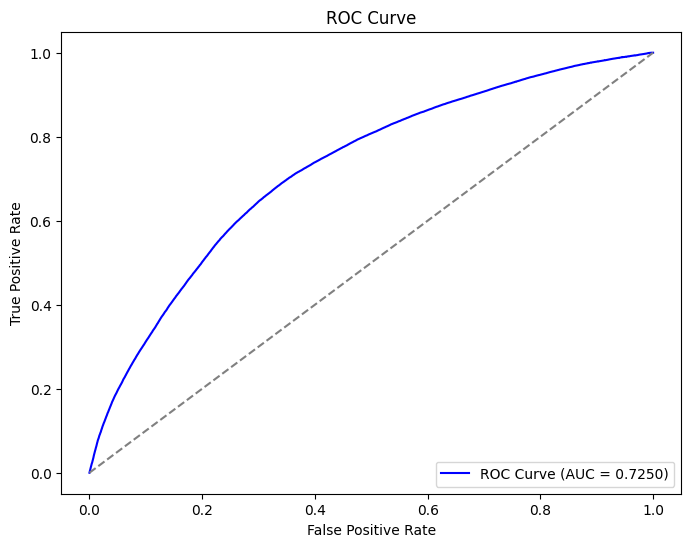

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC Score and ROC Curve for binary classification
if len(set(y_test)) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)  # Calculate ROC AUC score
    print(f'ROC AUC: {roc_auc:.4f}')

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


#### catboost Model

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=100,      # Number of boosting iterations
    learning_rate=0.1,   # Learning rate for boosting
    depth=6,             # Depth of the tree
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9018
Precision: 0.7338
Recall: 0.8021
F1 Score: 0.7664

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    265152
           1       0.73      0.80      0.77     66646

    accuracy                           0.90    331798
   macro avg       0.84      0.86      0.85    331798
weighted avg       0.91      0.90      0.90    331798



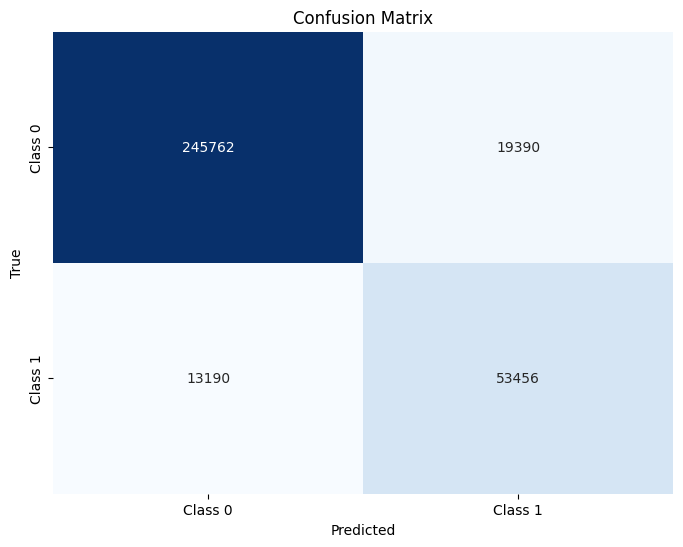

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=[f"Class {i}" for i in range(len(conf_matrix))],
            yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ROC AUC: 0.9481


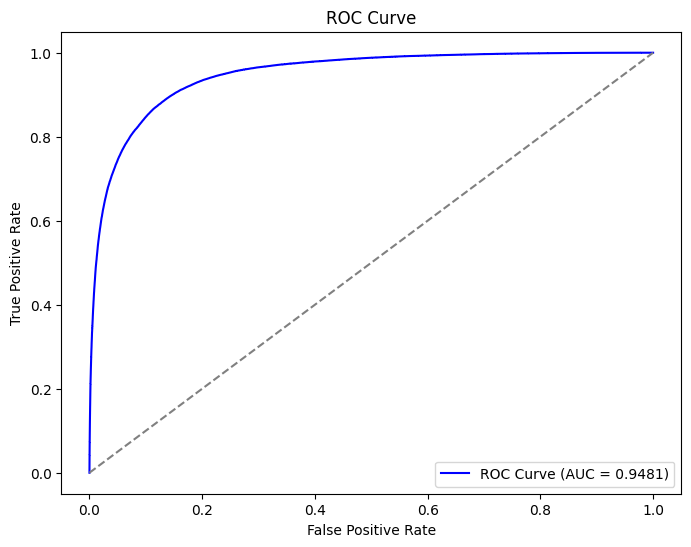

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC Score and ROC Curve for binary classification
if len(set(y_test)) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)  # Calculate ROC AUC score
    print(f'ROC AUC: {roc_auc:.4f}')

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


#### xgboost model

In [ ]:
# Balanced the dataset using SMOTE.
import xgboost as xgb


model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification task
    scale_pos_weight=1,           # Weight for the positive class
    learning_rate=0.1,            # Learning rate
    max_depth=6,                  # Maximum depth of the trees
    n_estimators=100,             # trees
    random_state=42               # Ensure reproducibility
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9118
Precision: 0.7552
Recall: 0.8299
F1 Score: 0.7908

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94    265152
           1       0.76      0.83      0.79     66646

    accuracy                           0.91    331798
   macro avg       0.86      0.88      0.87    331798
weighted avg       0.92      0.91      0.91    331798



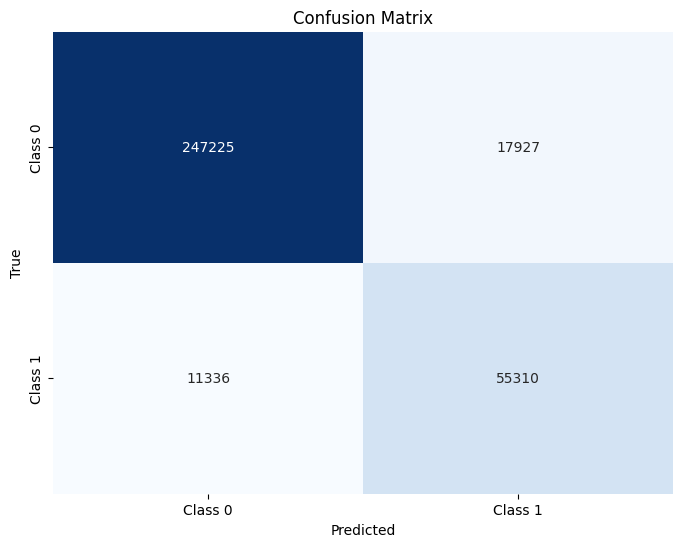

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=[f"Class {i}" for i in range(len(conf_matrix))],
            yticklabels=[f"Class {i}" for i in range(len(conf_matrix))])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ROC AUC: 0.9588


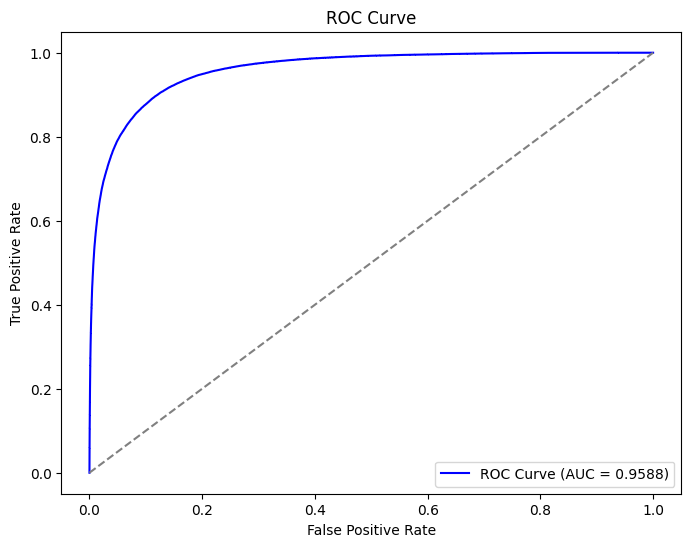

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC Score and ROC Curve for binary classification
if len(set(y_test)) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)  # Calculate ROC AUC score
    print(f'ROC AUC: {roc_auc:.4f}')

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
